## Week 4, Lab 1: Predicting Left-Handedness from Psychological Factors
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

We'll walk through a full data science problem in this lab. 

---
## Step 1: Define The Problem.

You're currently a data scientist working at a university. A professor of psychology is attempting to study the relationship between personalities and left-handedness. They have tasked you with gathering evidence so that they may publish.

Specifically, the professor says "I need to prove that left-handedness is caused by some personality trait. Go find that personality trait and the data to back it up."

As a data scientist, you know that any real data science problem must be **specific** and **conclusively answerable**. For example:
- Bad data science problem: "What is the link between obesity and blood pressure?"
    - This is vague and is not conclusively answerable. That is, two people might look at the conclusion and one may say "Sure, the problem has been answered!" and the other may say "The problem has not yet been answered."
- Good data science problem: "Does an association exist between obesity and blood pressure?"
    - This is more specific and is conclusively answerable. The problem specifically is asking for a "Yes" or "No" answer. Based on that, two independent people should both be able to say either "Yes, the problem has been answered" or "No, the problem has not yet been answered."
- Excellent data science problem: "As obesity increases, how does blood pressure change?"
    - This is very specific and is conclusively answerable. The problem specifically seeks to understand the effect of one variable on the other.

### 1. In the context of the left-handedness and personality example, what are three specific and conclusively answerable problems that you could answer using data science? 

> You might find it helpful to check out the codebook in the repo for some inspiration.

Answer: 

(1) On average, are people left handed if they do not work very hard in school?

 (2) Is there an association between education and left handedness? 
 
 (3) If you are left handed, do you agree with violent personality propositions the same as right handed people? 

---
## Step 2: Obtain the data.

### 2. Read in the file titled "data.csv."
> Hint: Despite being saved as a .csv file, you won't be able to simply `pd.read_csv()` this data!

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
import os
os.getcwd()

'/Users/annamitchell/Desktop/GA_Docs/Labs/lab_4.01'

In [7]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_table.html

df = pd.read_csv('/Users/annamitchell/Desktop/GA_Docs/Datasets/data.csv', sep = '\t')

In [8]:
df.head(1)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,2,1,22,3,1,1,3,2,3


### 3. Suppose that, instead of us giving you this data in a file, you were actually conducting a survey to gather this data yourself. From an ethics/privacy point of view, what are three things you might consider when attempting to gather this data?
> When working with sensitive data like sexual orientation or gender identity, we need to consider how this data could be used if it fell into the wrong hands!

Answer: 

(1) Allow them to be able to respond anonymously

(2): Allow them to submit their responses from a computer, so as not to have to accept a handwritten response to maintain as much anonymity as possible 

(3) If taking in person, make sure to be a in private room where no recording devices or people are nearby 

---
## Step 3: Explore the data.

### 4. Conduct exploratory data analysis on this dataset.
> If you haven't already, be sure to check out the codebook in the repo, as that will help in your EDA process.

In [10]:
# You know all the steps here. Get to it.

df.head(3)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,...,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,...,NL,2,2,30,4,1,1,1,1,2


### > My complete EDA is attached as a separate JN. I wanted to slim down your time on scrolling, as I know this is time consuming for you when grading

In [21]:
df.isnull().sum().head()

Q1    0
Q2    0
Q3    0
Q4    0
Q5    0
dtype: int64

In [14]:
df.shape

(4184, 56)

In [15]:
df['age'].value_counts() 

#would 73, 85, 78, 77 be outliers? Need to remove 409 

18     369
17     357
16     329
20     316
19     311
      ... 
73       1
85       1
409      1
78       1
77       1
Name: age, Length: 66, dtype: int64

In [16]:
df[(df['age'] == 409)]

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
2137,1,2,5,4,3,1,5,1,5,3,...,US,2,1,409,2,1,5,6,1,1


In [17]:
new_list = list(df['age'])

In [18]:
new_list.remove(409)

In [19]:
np.mean(new_list)

30.280181687783887

In [20]:
#Since our options for hand is right(1), left(2), or both(3), looking at the value counts to see the totals
# 84% right
# 11% left
# .04% both

df['hand'].value_counts()

1    3542
2     452
3     179
0      11
Name: hand, dtype: int64

---
## Step 4: Model the data.

### 5. Suppose I wanted to use Q1 - Q44 to predict whether or not the person is left-handed. Would this be a classification or regression problem? Why?

Answer: 

Classification. We are trying to determine if they are left handed, and there can only be two responses here, yes or no, which is a binary repsonse, also categorical. 

### 6. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed based on their responses to Q1 - Q44. Before doing that, however, you remember that it is often a good idea to standardize/scale ) your variables. In general, why would we standardize/scale  our variables? Give an example of when we would standardize/scale our variables.

Answer: 

We would standardize our variables to make sure all are being treated fairly, also to compare features that have diferent units of measure or different scales. We want them all weighted on a similar scale. This is to make sure that certain variable does overly effect our model just on how the variable is measured. 

One example of standardizing a variable would be if we were trying to determine someone's level of education by their socioecomonic status; because their level of education can only range on a 4.0 scale, but their socioecomic scale can vary greatly, these are two very different scaled variables. 

### 7. Give an example of when we might not standardize/scale our variables.

Answer: If they are weighed on the same scale, we would not standardize. We would also possibly not use if we were modeling linear regression, or the data provided is proportional. When we standarize/scale our data, we remove or adjust outliers. When the scale maters, we should not be standarizing our variables. 

### 8. Based on your answers to 6 and 7, do you think we should standardize/scale our predictor variables (or features) in this case? Why or why not?

Answer: 

It is important to standarize our preidictor variables in order for the model to work correctly. Since we are using KNN and it will be caluclating the distance between neighbors, this would make it sensitive to the degree of our variables. 

### 9. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed. What data cleaning do we need to do to our $y$ variable in order to explicitly answer this question? Do it.

First, we should look at the responses in the hand column:

In [21]:
df['hand'].value_counts()

1    3542
2     452
3     179
0      11
Name: hand, dtype: int64

In [22]:
df.shape

(4184, 56)

In [23]:
Right = (round(3542 / 4184, 2))
Left = (round(452 / 4184, 2))
Both = (round(179 / 4184, 2))
No_response = (11 / 4184)

In [24]:
print(f'{Right} percent of the data is right handed')
print(f'{Left} percent of the data is left handed')
print(f'{Both} percent of the data is both')
print(f'{No_response} percent of the data is no_response')

0.85 percent of the data is right handed
0.11 percent of the data is left handed
0.04 percent of the data is both
0.0026290630975143404 percent of the data is no_response


In [25]:
df['hand'].isnull().sum()

0

In [26]:
df = df[df.hand != 0]

In [27]:
df['hand'].value_counts()

1    3542
2     452
3     179
Name: hand, dtype: int64

In [28]:
#We need our variable to be binary, so I am making a right or left handed as the binary column

#"both" will be considered left handed, since the person can use their left hand still 

#start by using get_dummies to make 'hands' binary
left_handed = pd.get_dummies(df['hand'])

#rename columns for the dummies
left_handed.columns = ['right_handed', 'left_handed', 'both']

#combining left_hand and both to one column

left_handed['left_handed'] = left_handed['left_handed'] + left_handed['both']

#drop all columns other than left_hand 
left_handed.drop(columns = ['right_handed', 'both'], inplace = True)

In [29]:
left_handed.head(3)

,left_handed
0,1
1,0
2,1


In [30]:
#lets add that new left_handed column to data set
df = pd.concat((df, left_handed), axis = 1)

In [31]:
df.head()

#making sure it worked 

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand,left_handed
0,4,1,5,1,5,1,5,1,4,1,...,2,1,22,3,1,1,3,2,3,1
1,1,5,1,4,2,5,5,4,1,5,...,2,1,14,1,2,2,6,1,1,0
2,1,2,1,1,5,4,3,2,1,4,...,2,2,30,4,1,1,1,1,2,1
3,1,4,1,5,1,4,5,4,3,5,...,2,1,18,2,2,5,3,2,2,1
4,5,1,5,1,5,1,5,1,3,1,...,2,1,22,3,1,1,3,2,3,1


### 10. The professor for whom you work suggests that you set $k = 4$. In this specific case, why might this be a bad idea?

Answer: 

If k is set too small, there is a risk of overfitting the model. Because we have over 4,000 responses, we need more than 4. 

### 11. Let's *(finally)* use $k$-nearest neighbors to predict whether or not a person is left-handed!

> Be sure to create a train/test split with your data!

> Create four separate models, one with $k = 3$, one with $k = 5$, one with $k = 15$, and one with $k = 25$.

> Instantiate and fit your models.

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [37]:
type(df)

pandas.core.frame.DataFrame

In [38]:
#This code was slighty adapted from stackoverflow.com
#using list comprehension to get all numeric columns that I need and taking out the ones I dont
features = [x for x in df._get_numeric_data().columns if not x in ['left_handed', 
                                                                      'introelapse',
                                                                      'testelapse',
                                                                      'fromgoogle', 
                                                                      'engnat',
                                                                      'age', 
                                                                      'education',
                                                                      'religion',]]

In [39]:
#Set my X and Y
X = df[features]
y = df['left_handed']

In [40]:
X.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q39,Q40,Q41,Q42,Q43,Q44,gender,orientation,race,hand
0,4,1,5,1,5,1,5,1,4,1,...,5,5,5,1,5,1,1,1,3,3
1,1,5,1,4,2,5,5,4,1,5,...,1,3,1,4,4,5,2,2,6,1
2,1,2,1,1,5,4,3,2,1,4,...,1,4,2,2,2,2,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,...,1,2,1,1,1,3,2,5,3,2
4,5,1,5,1,5,1,5,1,3,1,...,5,5,5,1,5,1,1,1,3,3


In [121]:
#leaving the split as default
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [42]:
ss = StandardScaler()

In [43]:
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [45]:
#scaling the test and train X
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

### k = 3

In [52]:
#instantiating KNN for k = 3
knn3 = KNeighborsClassifier(n_neighbors=3)

In [53]:
#fitting for k = 3
knn3.fit(X_train_sc, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [54]:
knn3.score(X_train, y_train)

0.8494726749760306

In [55]:
knn3.score(X_test, y_test)

0.8486590038314177

In [56]:
cross_val_score(knn3, X_train, y_train, cv = 3).mean()

0.8184723553851071

### k = 5

In [57]:
#instantiating KNN for k = 5
knn5 = KNeighborsClassifier(n_neighbors=5)

In [58]:
#fitting for k = 5
knn5.fit(X_train_sc, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [59]:
knn5.score(X_train, y_train)

0.849153084052413

In [60]:
knn5.score(X_test, y_test)

0.8486590038314177

In [61]:
cross_val_score(knn5, X_train, y_train, cv = 3).mean()

0.8373282198785555

### k = 15

In [63]:
#instantiating KNN for k = 15
knn15 = KNeighborsClassifier(n_neighbors=15)

In [64]:
#fitting for k = 15
knn15.fit(X_train_sc, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [65]:
knn15.score(X_train, y_train)

0.849153084052413

In [66]:
knn15.score(X_test, y_test)

0.8477011494252874

In [67]:
cross_val_score(knn15, X_train, y_train, cv = 3).mean()

0.8494726749760306

## k = 25

In [68]:
#instantiating KNN for k = 25
knn25 = KNeighborsClassifier(n_neighbors=25)

In [69]:
#fitting for k = 25
knn25.fit(X_train_sc, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [70]:
knn25.score(X_train, y_train)

0.849153084052413

In [71]:
cross_val_score(knn25, X_train, y_train, cv=3).mean()

0.8491530840524129

Being good data scientists, we know that we might not run just one type of model. We might run many different models and see which is best.

### 12. We also want to use logistic regression to predict whether or not a person is left-handed. Before we do that, let's check the [documentation for logistic regression in sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Is there default regularization? If so, what is it? If not, how do you know?

Answer: 

Yes, there is a default regularization. It is L2(ridge) with a constant of 1. We know this because under parameters --> penatly --> it shows default as L2. 

### 13. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, should we standardize/scale our features?

Answer: 

Yes, I went ahead and scaled (see above) just to be sure. 

### 14. Let's use logistic regression to predict whether or not the person is left-handed.


> Be sure to use the same train/test split with your data as with your $k$-NN model above!

> Create four separate models, one with LASSO and $\alpha = 1$, one with LASSO and $\alpha = 10$, one with Ridge and $\alpha = 1$, and one with Ridge and $\alpha = 10$. *(Hint: Be careful with how you specify $\alpha$ in your model!)*

> Instantiate and fit your models.

### Lasso and a = 1

In [ ]:
#alpha is the parameter that adds penalty for number of features to control overfitting
#l1 = Lasso Regression, l for lambda, shrinks the coefficients and helps to reduce model complexity and multicollinearity
#l2 = Ridge regession 
#side note, Elastic net is an alpha parameter that is somewhere in between l1 and l2


In [78]:
#I orginally tried to run this with my penalty set to 'l1', but when I ran my fit, it gave me an error, "solver lbfgs suporrts only 'l2 or 'none properties"
#So, I visited good ole stackoverflow and tested out changing my solver to 'liblinear'

logreg1 = LogisticRegression(penalty = 'l1', C =1.0, solver='liblinear')

In [79]:
#the 'liblinear' solver worked for this

logreg1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
logreg1.score(X_train, y_train)

1.0

In [81]:
logreg1.score(X_test, y_test)

0.9980842911877394

In [82]:
cross_val_score(logreg1, X_train, y_train, cv = 3).mean()

1.0

### Lasso and a = 10

In [138]:
#using the solver for this one as well

logreg2 = LogisticRegression(penalty = 'l1', C = 10.0, solver = 'liblinear')

In [139]:
logreg2.fit(X_train, y_train)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [140]:
logreg2.score(X_train, y_train)

1.0

In [141]:
logreg2.score(X_test, y_test)

0.9980842911877394

In [142]:
cross_val_score(logreg2, X_train, y_train, cv = 3).mean()

1.0

### Ridge and a = 1

In [148]:
logreg3 = LogisticRegression(penalty = 'l2', C = 1.0)

In [153]:
logreg3.fit(X_train_sc, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [154]:
logreg3.score(X_train, y_train)

0.7155640779801854

In [155]:
logreg3.score(X_test, y_test)

0.7088122605363985

In [1]:
cross_val_score(logreg3, X_train_sc, y_train, cv=3).mean()

NameError: name 'cross_val_score' is not defined

### Ridge and a = 10

In [109]:
logreg4 = LogisticRegression(penalty = 'l2', C = 10)

In [157]:
logreg4.fit(X_train_sc, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [158]:
logreg4.score(X_train, y_train)

0.16906359859379994

In [159]:
logreg4.score(X_test, y_test)

0.16187739463601533

In [160]:
cross_val_score(logreg4, X_train, y_train, cv=3).mean()

1.0

---
## Step 5: Evaluate the model(s).

### 15. Before calculating any score on your data, take a step back. Think about your $X$ variable and your $Y$ variable. Do you think your $X$ variables will do a good job of predicting your $Y$ variable? Why or why not? What impact do you think this will have on your scores?

In [105]:
df.columns[44:54]

Index(['introelapse', 'testelapse', 'country', 'fromgoogle', 'engnat', 'age',
       'education', 'gender', 'orientation', 'race'],
      dtype='object')

Answer: 

Technically speaking, no I do not believe they would simply because the X variables did not show a very good correlation with which might be a dominant hand. There may have been some multicolinearity(like duplicate questions), which might have provided a lower accuracy score. 

Non technically speaking, still no. I used https://ghr.nlm.nih.gov/primer/traits/handedness as part as a reference on how to answer this. No, I do not believe that the X variables will do a good job predicting our Y variable. Studies have shown (such as the one I cited), that hand preference begins to develop before birth, and continues that development through childhood. Hand preference is based on human developement, and not things like your gender, orientation, or whether or not your HTTP referer contained "google". 

I do not think this is a good predictor for hand preference. However, semantics aside, the data is a great way to learn and practice Logistic Regression. 

### 16. Using accuracy as your metric, evaluate all eight of your models on both the training and testing sets. Put your scores below. (If you want to be fancy and generate a table in Markdown, there's a [Markdown table generator site linked here](https://www.tablesgenerator.com/markdown_tables#).)
- Note: Your answers here might look a little weird. You didn't do anything wrong; that's to be expected!

### One

In [118]:
import sklearn

In [161]:
#scoring my train knn = 3
knn3.score(X_train_sc, y_train)

0.9495046340683925

In [162]:
#scoring my test knn = 3
knn3.score(X_test_sc, y_test)

0.9176245210727969

## Two

In [125]:
#scoring my train knn = 5
knn5.score(X_train_sc, y_train)

0.9284116331096197

In [126]:
#scoring my train knn = 5
knn5.score(X_test_sc, y_test)

0.9128352490421456

### Three

In [127]:
#scoring my train knn = 15
knn15.score(X_train_sc, y_train)

0.8954937679769894

In [128]:
#scoring my train knn = 15
knn15.score(X_test_sc, y_test)

0.8975095785440613

### Four

In [129]:
#scoring my train knn = 25
knn25.score(X_train_sc, y_train)

0.8910194950463407

In [131]:
#scoring my train knn = 15
knn25.score(X_test_sc, y_test)

0.89272030651341

### Five

In [166]:
#scoring my train lr where alpha = 1 and penalty = l1
logreg1.score(X_train_sc, y_train)

1.0

In [167]:
#scoring my test lr where alpha = 1 and penalty = l1
logreg1.score(X_test_sc, y_test)

1.0

### Six

In [168]:
#scoring my train lr where alpha = 10 and penalty = l1
logreg2.score(X_train_sc, y_train)

1.0

In [169]:
#scoring my test lr where alpha = 10 and penalty = l1
logreg2.score(X_test_sc, y_test)

1.0

In [ ]:
# I am a little worried that all of these are coming out to 1

## Seven

In [172]:
#scoring my train lr where alpha = 1 and penalty = l2
logreg3.score(X_train_sc, y_train)

1.0

In [173]:
#scoring my test lr where alpha = 1 and penalty = l2
logreg3.score(X_test_sc, y_test)

1.0

### Eight

In [174]:
#scoring my train lr where alpha = 10 and penalty = l2
logreg4.score(X_train_sc, y_train)

1.0

In [175]:
#scoring my test lr where alpha = 10 and penalty = l2
logreg4.score(X_test_sc, y_test)

1.0

In [ ]:
## why are they all 1....

### 17. In which of your $k$-NN models is there evidence of overfitting? How do you know?

Answer: 

My knn models with n neighbors set 3 shows evidence of overfitting; the training score is much higher than the testing score. 

### 18. Broadly speaking, how does the value of $k$ in $k$-NN affect the bias-variance tradeoff? (i.e. As $k$ increases, how are bias and variance affected?)

Answer: 

As the value of k increasese, variance would increase and bias would decrease. 

### 19. If you have a $k$-NN model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

Answer: 

The value of k in the KNN algorithm is related to the error rate of the model. Overfitting implies that the model is well on the training data but has poor performance when the new data is coming. Therefore, some things I might try is reducing my k's, remove some features(or paradoxically increase the sample size), and use different X values to try and break up some of the noise. 

### 20. In which of your logistic regression models is there evidence of overfitting? How do you know?

Answer: 

I had 2 models that showed overfitting - knn = 3 and knn = 5. They both had higher training scores then testing scores. 

### 21. Broadly speaking, how does the value of $C$ in logistic regression affect the bias-variance tradeoff? (i.e. As $C$ increases, how are bias and variance affected?)

Answer: 

C is the inverse of alpha. As C increases, bias decreases and variance increases; however, as alpha increases, bias increases and variance decreases. 

### 22. For your logistic regression models, play around with the regularization hyperparameter, $C$. As you vary $C$, what happens to the fit and coefficients in the model? What do you think this means in the context of this specific problem?

Answer: 

If you increase C, the model becomes less overfit and the cross validation score on the training drops closer to the cross val on the testing. However, when I increased or decreased C, nothing happened, which is telling me that alpha may not have an affect on the model. 

### 23. If you have a logistic regression model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

Answer: 

(1) Use regularization to simplify
(2) Use a larger sample size, or make sure we are using as big a sample size as possible
(3) working better with variables - making sure the important ones are used right 

---
## Step 6: Answer the problem.

### 24. Suppose you want to understand which psychological features are most important in determining left-handedness. Would you rather use $k$-NN or logistic regression? Why?

Answer: 

I would most likley use k-nn because its simplier(it worked better for me as you can see above), probably because the hyperparemters arent as detailed as logistic regression. 

### 25. Select your logistic regression model that utilized LASSO regularization with $\alpha = 1$. Interpret the coefficient for `Q1`.

Answer:

In [176]:
logreg1.coef_

array([[ 0.00000000e+00, -7.54120709e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -4.12801247e-02,
        -6.66214914e-02, -5.98261475e-01, -5.84404916e-02,
        -1.44224213e-01, -1.68733586e-01, -1.42575007e-01,
        -2.79267445e-01,  0.00000000e+00,  0.00000000e+00,
        -3.53507073e-02,  0.00000000e+00, -2.82601614e-02,
        -1.23918329e-01, -6.66442756e-02, -5.59906664e-01,
        -2.38949029e-01, -1.95072097e-01, -1.43485271e-01,
        -1.32546589e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -7.26668262e-02,
        -1.92094913e-01,  0.00000000e+00, -2.39218168e-01,
        -8.16207771e-02, -2.23026616e-02, -1.01767630e-01,
        -1.03603366e-01,  0.00000000e+00,  0.00000000e+00,
        -1.55781002e-01, -1.42074306e-01, -8.33544632e-03,
         0.00000000e+00, -3.06546898e-02, -2.69416400e-01,
         0.00000000e+00, -2.22569821e-01,  1.32122631e+01]])

I a not using the first coefficient because its clearly 0...

The coefficient for the variable Q2 is -7.54, which means for a one unit increase in Q2, we expect a 7.54 decrease in the log odds of the dependant variable left handed. 

In [177]:
#trying out another way to do this  - This code was adapted from stackoverflow.com

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(logreg.coef_))], axis = 1)

In [178]:
coefficients.head()

,0,0
0,Q1,0.000000
1,Q2,-0.080411
2,Q3,0.000000
3,Q4,-0.000054
4,Q5,0.000000


In [181]:
#Interpret the coefficient for Q1
#This code was adapted from www.juanshishido.com"

import statsmodels.api as sm

np.exp(0.003985)

1.003992950670132

In [182]:
100 * ((np.exp(-0.016152)) - 1)

-1.602225592930051

### 26. If you have to select one model overall to be your *best* model, which model would you select? Why?
- Usually in the "real world," you'll fit many types of models but ultimately need to pick only one! (For example, a client may not understand what it means to have multiple models, or if you're using an algorithm to make a decision, it's probably pretty challenging to use two or more algorithms simultaneously.) It's not always an easy choice, but you'll have to make it soon enough. Pick a model and defend why you picked this model!

Answer: 

Looking over my models, my knn models seemed to perform the best, so I would choose that one. 

### 27. Circle back to the three specific and conclusively answerable questions you came up with in Q1. Answer one of these for the professor based on the model you selected!

There seems to be no strong evidence that would indicate personality is an indicator of whether or not a person is left handed. 

In [184]:
X.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44', 'gender', 'orientation', 'race', 'hand'],
      dtype='object')

In [187]:
#ques_27 = df[columns[:30]]


In [186]:
#ques_27['hand'] = df['hand']

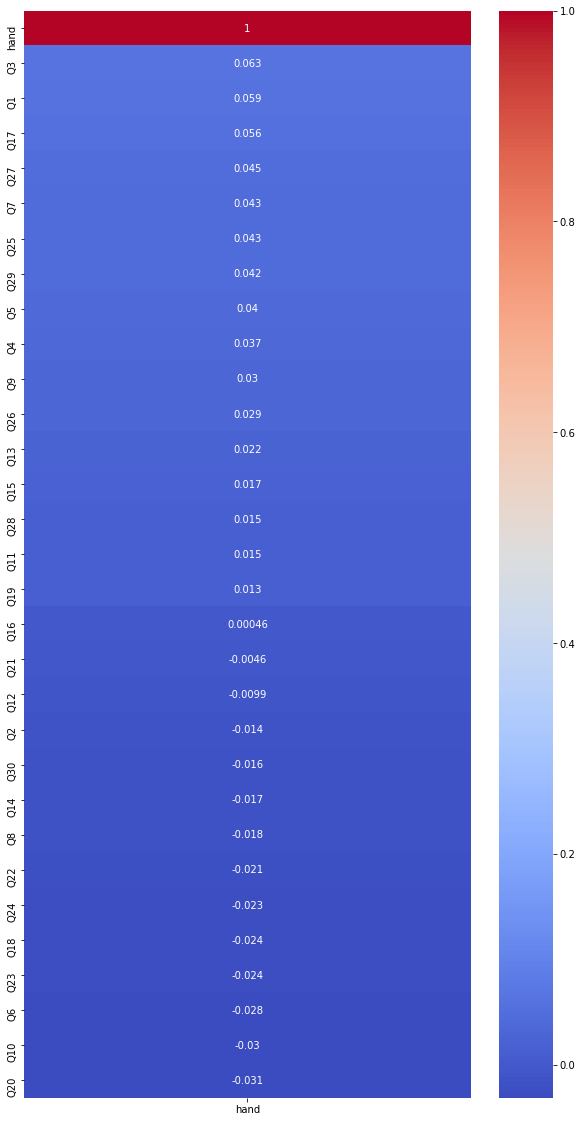

In [150]:
plt.figure(figsize=(10, 20))

sns.heatmap(ques_27.corr()[['hand']].sort_values('hand', ascending=False), annot=True, cmap='coolwarm');

#Not entirely sure how to answer this... there are not any questions that correlate strongly with the hand column. 

### BONUS:
Looking for more to do? Probably not - you're busy! But if you want to, consider exploring the following. 

**whispers** (Yes, you do want to address these at some point. You really do. Seriously. Trust us on this.) 
- Create a visual plot comparing training and test metrics for various values of $k$ and various regularization schemes in logistic regression.
- Rather than just evaluating models based on accuracy, consider using `sensitivity`, `specificity`, etc.
- In the context of predicting left-handedness, why are unbalanced classes concerning? If you were to re-do this process given those concerns, what changes might you make?
- Fit and evaluate a generalized linear model other than logistic regression (e.g. Poisson regression).
- Suppose this data were in a `SQL` database named `data` and a table named `inventory`. What `SQL` query would return the count of people who were right-handed, left-handed, both, or missing with their class labels of 1, 2, 3, and 0, respectively? (You can assume you've already logged into the database.)